Bruna Marielle

Fernanda Rodrigues

Matheus Alves

Rodrigo Almeida

In [1]:
import pandas as pd
import random

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np

In [3]:
# Leitura da base de dados, já tratando o csv
df = pd.read_csv('/content/Bruna_Marielle_Celestino_Palhuzi.csv', sep=';', encoding='utf-8')

In [4]:
df2 = pd.read_csv('/content/Fernanda_Vieira_Rodrigues.csv', sep=';', encoding='utf-8')

In [5]:

df3 = pd.read_csv('/content/Matheus_Alves_de_Lira.csv', sep=';', encoding='utf-8')

In [6]:
df4 = pd.read_csv('/content/Rodrigo_Oliveira_de_Almeida.csv', sep=';', encoding='utf-8')

In [7]:
df_join = pd.concat([df, df2, df3, df4], axis = 0)

In [8]:
df_join

,genero,idade,renda,consumo
0,masculino,32.0,75.0,93.0
1,masculino,70.0,49.0,55.0
2,feminino,46.0,54.0,44.0
3,feminino,-6.0,NaN,-8.0
4,masculino,47.0,43.0,41.0
...,...,...,...,...
245,masculino,25.0,77.0,12.0
246,feminino,35.0,19.0,99.0
247,feminino,115.0,390.0,144.0
248,feminino,35.0,74.0,72.0


In [9]:
# Dropando Os valores vazios
df_join.dropna(axis=0, how='any', inplace=True)

df_join

,genero,idade,renda,consumo
0,masculino,32.0,75.0,93.0
1,masculino,70.0,49.0,55.0
2,feminino,46.0,54.0,44.0
4,masculino,47.0,43.0,41.0
5,masculino,28.0,87.0,75.0
...,...,...,...,...
245,masculino,25.0,77.0,12.0
246,feminino,35.0,19.0,99.0
247,feminino,115.0,390.0,144.0
248,feminino,35.0,74.0,72.0


In [10]:
df_join.loc[df_join.idade < 0, 'idade'] = random.randint(40, 70)

In [11]:
df_join.loc[df_join.idade < 18, 'idade'] = 18

In [12]:
# Substituindo os valores negativos
df_join.loc[df_join.renda < 0, 'renda'] = random.randint(46, 86)

In [13]:
df_join.loc[df_join.consumo < 0, 'consumo'] = random.randint(46, 86)

In [14]:
import plotly.express as px

In [15]:
px.box(df_join.renda)

In [16]:
# Substituindo os outliers em renda
df_join.loc[df.renda > 137, 'renda'] = random.randint(46, 86)

In [17]:
px.box(df_join.idade)

In [18]:
# Substituindo os outliers em idade
df_join.loc[df_join.idade > 70, 'idade'] = random.randint(40, 70)

In [19]:
px.box(df_join.idade)

In [20]:
px.box(df_join.consumo)

In [21]:
# Substituindo os outliers em consumo
df_join.loc[df_join.consumo > 100, 'consumo'] = random.randint(41, 79)

In [22]:
df_join.describe()

,idade,renda,consumo
count,647.00000,647.000000,647.000000
mean,41.72643,88.083462,52.697063
std,17.13363,97.604746,24.548197
min,18.00000,15.000000,1.000000
25%,28.00000,48.000000,41.000000
50%,38.00000,63.000000,50.000000
75%,53.50000,78.000000,75.000000
max,70.00000,582.000000,100.000000


In [23]:

#df_join
df_join = df_join.drop(columns= ['genero','renda'],axis=1)
df_join

,idade,consumo
0,32.0,93.0
1,70.0,55.0
2,46.0,44.0
4,47.0,41.0
5,28.0,75.0
...,...,...
245,25.0,12.0
246,35.0,99.0
247,70.0,47.0
248,35.0,72.0


In [24]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaler.fit(df_join)
#X = scaler.transform(df_join)

In [25]:
X = df_join[['consumo','idade']]

In [26]:
clustering = DBSCAN(eps=5, min_samples=10).fit(df_join)

In [27]:
df_join['clusterpredito'] = clustering.fit_predict(X)

In [28]:
clusters = len(df_join.clusterpredito.unique())

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

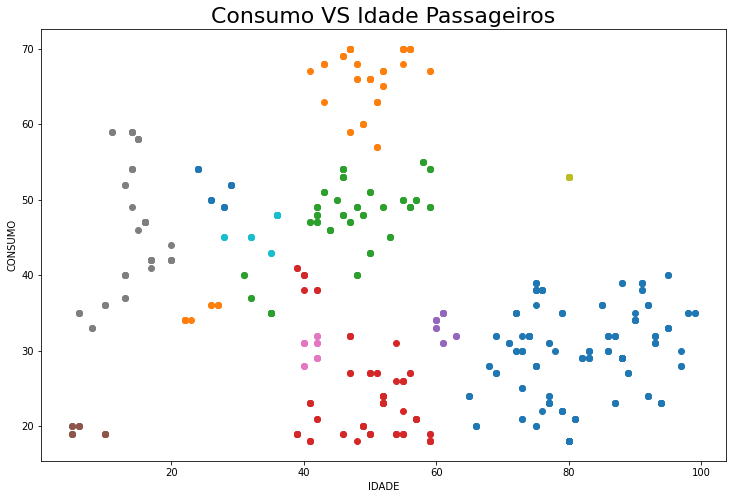

In [30]:
# Visualise the clusters, considering Income and Spending
plt.figure(figsize=(27,27))
plt.subplot(3,2,1)
plt.title('Consumo VS Idade Passageiros',fontsize=22)
plt.xlabel('IDADE') 
plt.ylabel('CONSUMO')
for i in range(0,clusters):
  plt.scatter(df_join.consumo[df_join.clusterpredito == i], 
  df_join.idade[df_join.clusterpredito == i])
 